In [ ]:
This is a graph looking at the avereage comment score on Reddit for comments that mention words associated with Christianity, Judaism, Islam, or General Religion. In general, comments with religious text, outside of purely christian text, perform worse.

In [1]:
import pandas as pd
pos = pd.read_csv('C:/Users/Pablo/Desktop/DataIncubator/Reddit Data Set/comments_positive.csv')
neg = pd.read_csv('C:/Users/Pablo/Desktop/DataIncubator/Reddit Data Set/comments_negative.csv')
pos =  pos.sample(n=50000, random_state=12)
neg =  neg.sample(n=50000, random_state=12)
total = pd.concat([pos,neg])
total = total.dropna()

In [8]:
"""
First real question of the data set
Does religious text predict comment score?
"""
#Lets define some religious text (non extensive of course)
christian_text = ('god|christian|jesus|faith|church|catholic|protestant|evangelical|christ|lord|baptist|orthodox|worship|bible|lutheran')
judiasm_text = ('judaism|jew|isreal|holocaust|hebrew|passover|synagogue|yiddish|jewish|isrealite|hannukah|yom kippur')
muslim_text = ('muslim|sunni|islam|islamic|arabic|islamist|muhammad|shiite')
#now, create a variable in the data set for mentions of the text. 
#The text column is the one of interest
total['christian_text'] = total['text'].str.contains(christian_text, case = False)
total['judiasm_text'] = total['text'].str.contains(judiasm_text, case = False)
total['muslim_text'] = total['text'].str.contains(muslim_text, case = False)
total['religion_text'] = total['text'].str.contains('religion', case = False)





total['christian_text'].sum()
total['judiasm_text'].sum()
total['muslim_text'].sum()
total['religion_text'].sum()

a = total['score'].mean()
b = total.groupby('christian_text')['score'].mean()[True]
c = total.groupby('judiasm_text')['score'].mean()[True]
d = total.groupby('muslim_text')['score'].mean()[True]
e = total.groupby('religion_text')['score'].mean()[True]

data = (a, b, c, d, e)

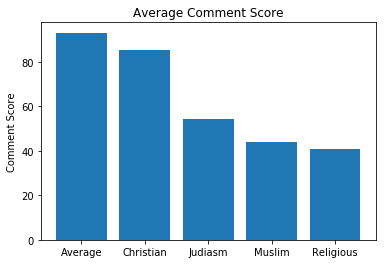

In [9]:
import matplotlib.pyplot as plt
ax = plt.bar(('Average','Christian','Judiasm','Islam','Religious'), data)
plt.ylabel('Comment Score')
plt.title('Average Comment Score')
plt.show()

In [7]:
print(data)

(93.18504740189607, christian_text
False    93.445521
True     85.252281
Name: score, dtype: float64, judiasm_text
False    93.372434
True     54.577640
Name: score, dtype: float64, muslim_text
False    93.406532
True     44.080178
Name: score, dtype: float64, religion_text
False    93.422518
True     40.653333
Name: score, dtype: float64)
